## Observations and Insights 

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, on=["Mouse ID"], how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [192]:
# Checking the number of mice.
total_mice = combined_data['Mouse ID'].nunique()
total_mice

249

In [213]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
main_df = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [196]:
# Checking the number of mice in the clean DataFrame.
len(main_df['Mouse ID'].unique())

249

## Summary Statistics

In [197]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_mean = main_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = main_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = main_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_stdev = main_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = main_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
reg_df = pd.DataFrame({'Mean': regimen_mean,
                       'Median': regimen_median,
                       'Variance': regimen_var,
                       'Standard Deviation': regimen_stdev,
                       'SEM': regimen_sem})
reg_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

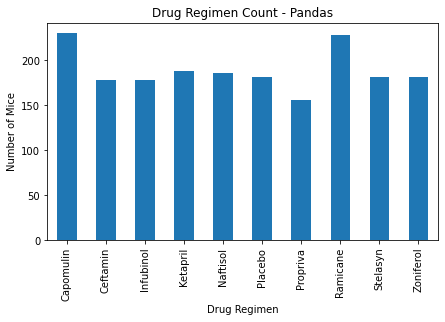

In [198]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_df = main_df.groupby("Drug Regimen")["Mouse ID"].count()

bar_df.plot(kind='bar', figsize=(7,4))
plt.title("Drug Regimen Count - Pandas")
plt.ylabel("Number of Mice")
plt.show()

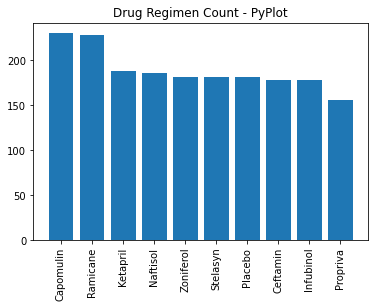

In [199]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = main_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis)

# Label the tick marks with Drug Regimen and format graph
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values)
plt.xticks(rotation=90)
plt.title("Drug Regimen Count - PyPlot")
plt.show()

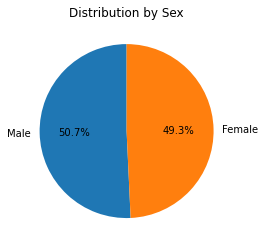

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = main_df['Sex'].value_counts()

pie_chart = pie_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_chart.set_ylabel('')
plt.show()

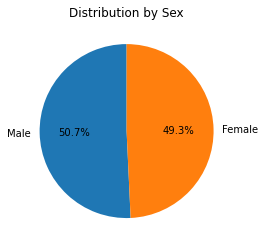

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data, labels=pie_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [202]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxtp = pd.DataFrame(main_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df1 = pd.merge(main_df, maxtp, on='Mouse ID')
merge_df = merge_df1.rename(columns = {'Timepoint_y':'Max_Timepoint', 'Timepoint_x':'Timepoint'}, inplace = False)
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [203]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = merge_df.loc[merge_df['Drug Regimen'] == t]
    drug_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max_Timepoint']]
    values = drug_df['Tumor Volume (mm3)']
    tumor_vol.append(values)
    
    # Determine IQR, outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {t}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {t}: {lower_bound}')
    print(f'Upper Bound for {t}: {upper_bound}')
    
    outliers = (values.loc[(drug_df['Tumor Volume (mm3)'] >= upper_bound) | 
                    (drug_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {t} outliers: {outliers}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


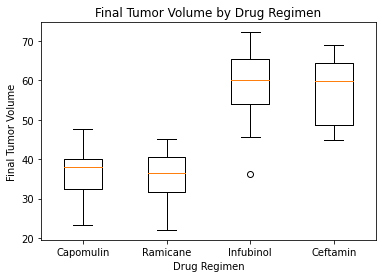

In [206]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume')
plt.show()

## Line and Scatter Plots

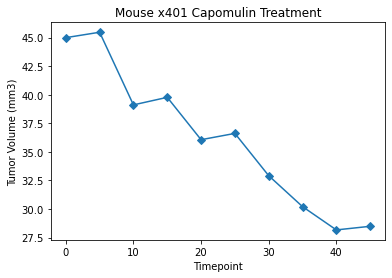

In [220]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = main_df.loc[main_df['Mouse ID'] == 'x401']
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = 'D')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse x401 Capomulin Treatment")
plt.show()

In [243]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = main_df.loc[main_df['Drug Regimen'] == 'Capomulin']
avg_tum_vol_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge average tumor volume onto data_df and drop duplicates
avg_tum_vol_df = pd.merge(capomulin_df, avg_tum_vol_df, on='Mouse ID')
scatter_df = avg_tum_vol_df[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()

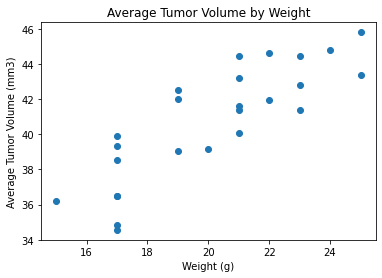

In [244]:
x = scatter_df['Weight (g)']
y = scatter_df["Tumor Volume (mm3)_y"]

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for Capomulin is 0.8.


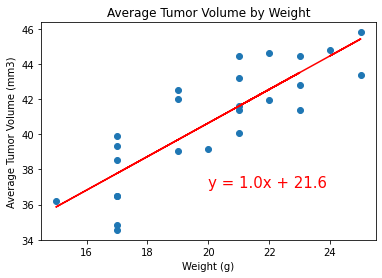

In [254]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = scatter_df['Weight (g)']
y = scatter_df["Tumor Volume (mm3)_y"]
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume for Capomulin is {round(correlation[0],1)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
r_values = x * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,r_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()